In [36]:
from random import randint

Comments in functions are their equivalent to pseudocode from hw2

In [37]:
def partition(A, pivot):
    Al = [] #Al <- []
    Ar = [] #Ar <- []
    for i in range(len(A)): #for i <-1 to n
        if i != pivot: # if i != pivot:
            if A[i] < A[pivot]:  #if A[i] < pivot
                Al.append(A[i]) #Al<-Al+A[i]
            else:
                Ar.append(A[i]) #Ar<Ar+A[i]
    A[:] = Al + [A[pivot]] + Ar # A <- Al + A[pivot] + Ar
    return len(Al) #return |Al|+1

In [51]:
def quicksort_partition(A):
    if len(A) > 1:
        pivot = randint(0,len(A) - 1) #p<-random(A)
        r = partition(A,pivot) #r<-partition(p)
        # We have to change it slightly here because when passing a slice in python it creates
        # a new array which means that I have to return the array in order to modify the original
        A[:r] = quicksort_partition(A[:r]) #Quicksort(A[1,...,r])
        A[r+1:] = quicksort_partition(A[r+1:])#Quicksort(A[r+1,...,n])
        return A
    return A

In [39]:
def swap(A, pivot):
    A[pivot], A[len(A) - 1] = A[len(A) - 1], A[pivot] #swap A[P]<->A[n]
    l = 0 #l<-0    <<#items,pivot>>
    for i in range(len(A)): #for i<-1 to n-1
        if A[i] < A[len(A) - 1]:#if A[i]<A[n]
            A[l], A[i] = A[i], A[l]#swap A[l]<->A[i]
            l += 1#l<-l+1
    A[len(A) -1], A[l] = A[l], A[len(A) -1]#swap A[n]<->A[l+1]
    return l #return l

In [52]:
def quicksort_swap(A):
    if len(A) > 1: #if(n>1)
        pivot = randint(0,len(A) - 1) #Choose a pivot element A[p]
        r = swap(A, pivot) #r<-Partition(A,p)
        # We have to change it slightly here because when passing a slice in python it creates
        # a new array which means that I have to return the array in order to modify the original
        A[:r] = quicksort_swap(A[:r]) #QuickSort(A[1..r])  <<Recurse!>>
        A[r+1:] = quicksort_swap(A[r+1:])#QuickSort(A[r+1..n])  <<Recurse!>>
        return A
    return A

In [41]:
# This function checks whether or not a given array is sorted
def is_sorted(A):
    prev = -1000001
    for n in A:
        if n >= prev:
            prev = n
        else:
            return False
    return True

In [42]:
# Generating the test cases
num_tests = 5000
part_tests = [[randint(-1000000,1000000) for n in range(i)] for i in range(num_tests)]
swap_tests = [a for a in part_tests]

In [43]:
import matplotlib.pyplot as plt
import time

In [44]:
# Testing partition for quicksort
times_part = []
not_sorted = []
for i in range(num_tests):
    to_sort = part_tests[i]
    start = time.perf_counter_ns()
    quicksort_partition(to_sort)
    times_part.append((i, time.perf_counter_ns() - start))
    if not is_sorted(to_sort):
        not_sorted.append(to_sort)
# check if any of the lists weren't sorted properly
len(not_sorted)

0

In [45]:
# Testing swap for quicksort
times_swap = []
not_sorted = []
for i in range(num_tests):
    to_sort = swap_tests[i]
    start = time.perf_counter_ns()
    quicksort_swap(to_sort)
    times_swap.append((i, time.perf_counter_ns() - start))
    if not is_sorted(to_sort):
        not_sorted.append(to_sort)
# check if any of the lists weren't sorted properly
len(not_sorted)

0

Below is the visualization of time for both swap and partition. The same dataset was used for both. The time was measured in nanoseconds.

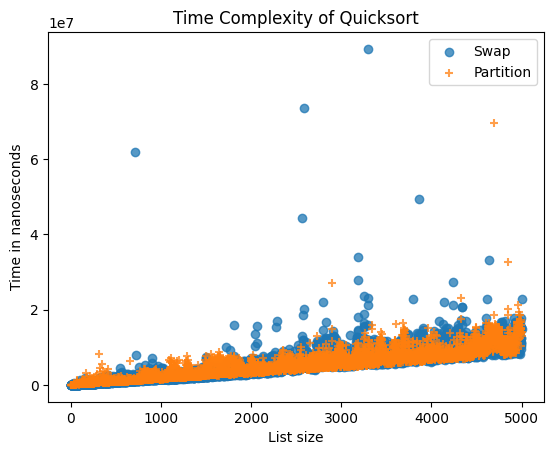

In [53]:
plt.scatter(*zip(*times_swap), alpha=0.75, label="Swap")
plt.scatter(*zip(*times_part), marker='+', alpha=0.75, label="Partition")
plt.title("Time Complexity of Quicksort")
plt.xlabel("List size")
plt.ylabel("Time in nanoseconds")
plt.legend()
plt.show()

In [48]:
abs = 0
for (s,p) in zip(times_swap,times_part):
    abs += (p[1] - s[1])
print(f"Partition is {abs / ((5000) * 5001 / 2)}ns slower per element on average")

Partition is -53.93024595080984ns slower per element on average
